In [162]:
def warn(*args, **kwargs):
    pass
import warnings
# warnings.warn = warn

In [163]:
import pandas as pd
import numpy as np 

In [164]:
inc = pd.read_csv('.\\adult.csv')

Data Source [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult)

In [165]:
inc.head()

,age,workClass,education,educationNum,maritalStatus,occupation,race,sex,hoursPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,13,Single,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Married,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married,Prof-specialty,Black,Female,40,Cuba,<=50K


In [166]:
inc.drop(['workClass', 'education', 'occupation', 'nativeCountry'], axis=1, inplace=True)

In [167]:
inc.head()

,age,educationNum,maritalStatus,race,sex,hoursPerWeek,income
0,39,13,Single,White,Male,40,<=50K
1,50,13,Married,White,Male,13,<=50K
2,38,9,Married,White,Male,40,<=50K
3,53,7,Married,Black,Male,40,<=50K
4,28,13,Married,Black,Female,40,<=50K


In [168]:
marital_stat = pd.get_dummies(inc.maritalStatus, prefix='is')
marital_stat.head()

,is_Devorced,is_Married,is_Single
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [169]:
race = pd.get_dummies(inc.race, prefix='is')
race.head()

,is_Black,is_Brown,is_White
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0


In [170]:
inc.drop(['maritalStatus', 'race'], axis=1, inplace=True)
inc = inc.join(marital_stat).join(race)
inc.head()

,age,educationNum,sex,hoursPerWeek,income,is_Devorced,is_Married,is_Single,is_Black,is_Brown,is_White
0,39,13,Male,40,<=50K,0,0,1,0,0,1
1,50,13,Male,13,<=50K,0,1,0,0,0,1
2,38,9,Male,40,<=50K,0,1,0,0,0,1
3,53,7,Male,40,<=50K,0,1,0,1,0,0
4,28,13,Female,40,<=50K,0,1,0,1,0,0


In [171]:
inc.income = inc.income.map({'<=50K': 0, '>50K': 1})
inc.sex = inc.sex.map({'Male': 0, 'Female': 1})
inc.head()

,age,educationNum,sex,hoursPerWeek,income,is_Devorced,is_Married,is_Single,is_Black,is_Brown,is_White
0,39,13,0,40,0,0,0,1,0,0,1
1,50,13,0,13,0,0,1,0,0,0,1
2,38,9,0,40,0,0,1,0,0,0,1
3,53,7,0,40,0,0,1,0,1,0,0
4,28,13,1,40,0,0,1,0,1,0,0


In [172]:
inc[pd.isnull(inc).any(axis=1)]

,age,educationNum,sex,hoursPerWeek,income,is_Devorced,is_Married,is_Single,is_Black,is_Brown,is_White


In [173]:
y = inc.income.copy()
x = inc.drop('income', axis=1)

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2645)

In [176]:
from sklearn import metrics

In [177]:
def fit_and_predict(fit, predict):
    fit(x_train, y_train)
    _y_pred = predict(x_test)
    a = metrics.accuracy_score(y_test, _y_pred)
    p = metrics.precision_score(y_test, _y_pred)
    r = metrics.recall_score(y_test, _y_pred)
    print("Accuracy: ", a)
    print("Precision: ", p)
    print("Recall: ", r)
    return [a, p, r]

In [178]:
plot_data = list()

# Logistic Regression

In [179]:
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier

In [204]:
lr = LogisticRegression(max_iter=108)
plot_data.append({'LR': fit_and_predict(lr.fit, lr.predict)})

Accuracy:  0.8062336864732075
Precision:  0.649602824360106
Recall:  0.45971267957526546


In [181]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 15.0, 'Predicted')

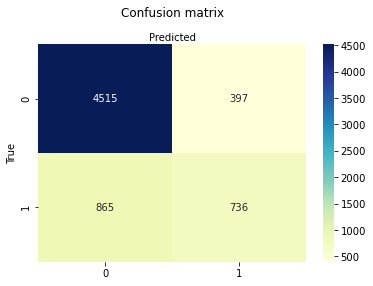

In [182]:
y_pred = pd.Series(lr.predict(x_test))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Perceptron

In [183]:
perc = Perceptron()
plot_data.append({'PRC': fit_and_predict(perc.fit, perc.predict)})

Accuracy:  0.6098572086596039
Precision:  0.3810728744939271
Recall:  0.9406620861961275


# Stochastic Gradient Descent

In [184]:
sgd = SGDClassifier()
plot_data.append({'SGD': fit_and_predict(sgd.fit, sgd.predict)})

Accuracy:  0.7922616305849839
Precision:  0.5836707152496626
Recall:  0.5402873204247346


# KNN

In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
knn = KNeighborsClassifier(n_neighbors = 49)
plot_data.append({'KNN': fit_and_predict(knn.fit, knn.predict)})

Accuracy:  0.8016275142023646
Precision:  0.6306001690617076
Recall:  0.46595877576514677


# Linear SVC

In [187]:
from sklearn.svm import LinearSVC

In [188]:
lsvc = LinearSVC()
plot_data.append({'SVM': fit_and_predict(lsvc.fit, lsvc.predict)})

Accuracy:  0.7689236910793797
Precision:  0.8478260869565217
Recall:  0.0730793254216115
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# Naive Bayes

In [189]:
from sklearn.naive_bayes import GaussianNB

In [190]:
gnb = GaussianNB()
plot_data.append({'GNB': fit_and_predict(gnb.fit, gnb.predict)})

Accuracy:  0.6411791801013358
Precision:  0.3913171884229179
Recall:  0.8276077451592755


# Decision Tree

In [191]:
from sklearn.tree import DecisionTreeClassifier

In [192]:
dt = DecisionTreeClassifier()
plot_data.append({'DT': fit_and_predict(dt.fit, dt.predict)})

Accuracy:  0.7785966528481498
Precision:  0.5636509207365893
Recall:  0.4397251717676452


# Random Forest

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
rf = RandomForestClassifier()
plot_data.append({'RF': fit_and_predict(rf.fit, rf.predict)})

Accuracy:  0.7861200675571933
Precision:  0.5798771121351767
Recall:  0.47158026233604


In [195]:
plot_data

[{'LR': [0.8062336864732075, 0.649602824360106, 0.45971267957526546]},
 {'PRC': [0.6098572086596039, 0.3810728744939271, 0.9406620861961275]},
 {'SGD': [0.7922616305849839, 0.5836707152496626, 0.5402873204247346]},
 {'KNN': [0.8016275142023646, 0.6306001690617076, 0.46595877576514677]},
 {'SVM': [0.7689236910793797, 0.8478260869565217, 0.0730793254216115]},
 {'GNB': [0.6411791801013358, 0.3913171884229179, 0.8276077451592755]},
 {'DT': [0.7785966528481498, 0.5636509207365893, 0.4397251717676452]},
 {'RF': [0.7861200675571933, 0.5798771121351767, 0.47158026233604]}]

In [196]:
labels = list()
accuracies = list()
precisions = list()
recalls = list()
for m in plot_data:
    for k, v in m.items():
        labels.append(k)
        accuracies.append(v[0])
        precisions.append(v[1])
        recalls.append(v[2])

In [202]:
results = pd.DataFrame({'Model': labels, 'Score': accuracies})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
LR,0.806234
KNN,0.801628
SGD,0.792262
RF,0.786120
DT,0.778597
SVM,0.768924
GNB,0.641179
PRC,0.609857


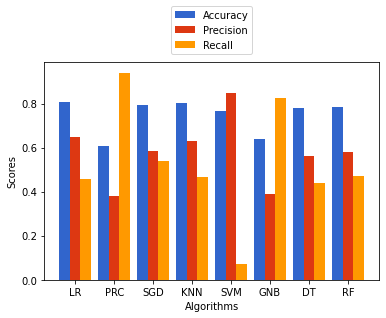

In [198]:
ind = np.arange(8)
width = 0.27

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, accuracies, width, color='#3165cc')
rects2 = ax.bar(ind+width, precisions, width, color='#dd3812')
rects3 = ax.bar(ind+width*2, recalls, width, color='#ff9900')

ax.set_ylabel('Scores')
ax.set_xlabel('Algorithms')
ax.set_xticks(ind+width)
ax.set_xticklabels(labels)
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Precision', 'Recall'), loc='upper center', bbox_to_anchor=(0.5,1.28))

plt.show()